In [1]:
import json
import pandas as pd
import seaborn as sns

In [2]:
# List of experiments, with k, chunk type, chunk size.
list_exps = [
(2, 'words', 50),
(2, 'words', 300),
(2, 'words', 500),
(5, 'words', 50),
(5, 'words', 300),
(5, 'words', 500),
(10, 'words', 50),
(10, 'words', 300),
(10, 'words', 500),
(15, 'words', 50),
(15, 'words', 300),
(15, 'words', 500),
(2, 'sentences', 10),
(2, 'sentences', 50),
(2, 'sentences', 100),
(5, 'sentences', 10),
(5, 'sentences', 50),
(5, 'sentences', 100),
(10, 'sentences', 10),
(10, 'sentences', 50),
(10, 'sentences', 100),
(15, 'sentences', 10),
(15, 'sentences', 50),
(15, 'sentences', 100),
(2, 'paragraphs', 1),
(2, 'paragraphs', 5),
(2, 'paragraphs', 10),
(2, 'paragraphs', 15),
(5, 'paragraphs', 1),
(5, 'paragraphs', 5),
(5, 'paragraphs', 10),
(5, 'paragraphs', 15),
(10, 'paragraphs', 1),
(10, 'paragraphs', 5),
(10, 'paragraphs', 10),
(10, 'paragraphs', 15),
(15, 'paragraphs', 1),
(15, 'paragraphs', 5),
(15, 'paragraphs', 10),
(15, 'paragraphs', 15),
(1, 'pages', 1),
(2, 'pages', 1),
(5, 'pages', 1),
(10, 'pages', 1),
(15, 'pages', 1),
]

In [4]:
# loading the metrics from the json files
list_vals = []
for TOP_K, CHUNK_TYPE, CHUNK_SIZE in list_exps:
    metrics_filename = f"outputs/morehop_metrics_k{TOP_K}_type{CHUNK_TYPE}_size{CHUNK_SIZE}.json"
    metrics = json.load(open(metrics_filename))
    toAdd = {"k": TOP_K, "chunk_type": CHUNK_TYPE, "chunk_size": CHUNK_SIZE}

    # For now I'll only load the full dataset metrics, change this if you want to load the other ones.
    dict_metrics = metrics['full_dataset']['full_dataset']
    toAdd |= dict_metrics
    list_vals.append(toAdd)

In [7]:
df = pd.DataFrame(list_vals)[['k', 'chunk_type', 'chunk_size', 'EM', 'context_recall']]
df

,k,chunk_type,chunk_size,EM,context_recall
0,2,words,50,0.375000,0.300000
1,2,words,300,0.358333,0.325000
2,2,words,500,0.341667,0.291667
3,5,words,50,0.550000,0.500000
4,5,words,300,0.550000,0.375000
5,5,words,500,0.458333,0.358333
6,10,words,50,0.616667,0.533333
7,10,words,300,0.616667,0.475000
8,10,words,500,0.541667,0.433333
9,15,words,50,0.666667,0.600000


In [10]:
def all_chunks_heatmap(df, metric):
    toPlot = df[["k", "chunk_type", "chunk_size", metric]]
    sns.heatmap(toPlot.pivot(index=["chunk_type", "chunk_size"], columns="k", values=metric), cmap = "crest", annot = True).set_title(metric + " by chunks")

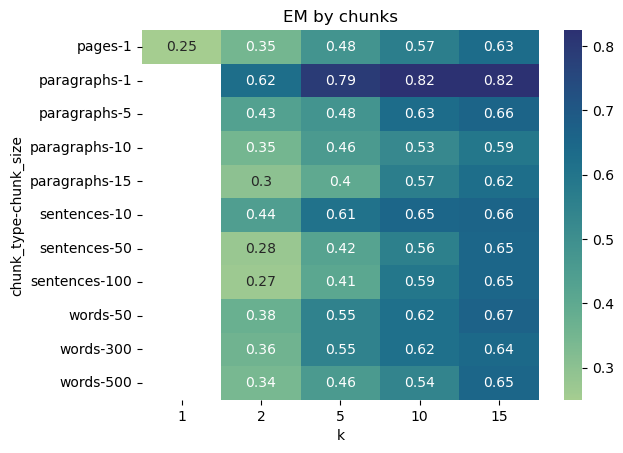

In [11]:
all_chunks_heatmap(df, "EM")

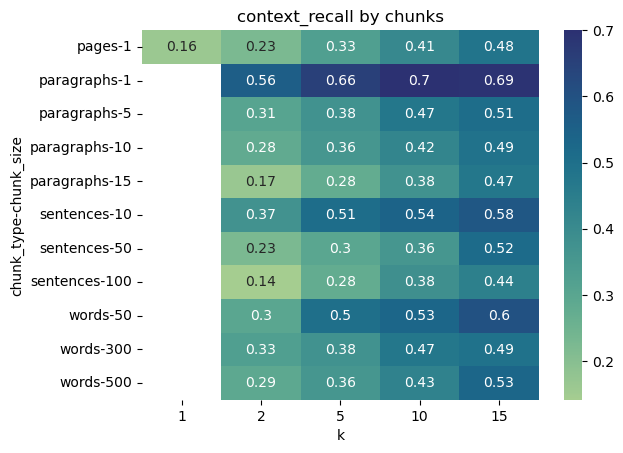

In [12]:
all_chunks_heatmap(df, "context_recall")